In [1]:
from PIL import Image
import numpy as np
import os

Image.MAX_IMAGE_PIXELS = 1600000000 # 40,000 squared

In [2]:
#download data
from downloadWaterData import downloadWaterData
d = downloadWaterData('Data')
longs = ['50N']
lats = ['10E']
d.downloadData('occurrence', longs, lats)
d.downloadData('change', longs, lats)
d.downloadData('seasonality', longs, lats)
d.downloadData('recurrence', longs, lats)
d.downloadData('transitions', longs, lats)

50N 10E
Data/occurrence_10E_50Nv1_3_2020.tif already exists - skipping
50N 10E
Data/change_10E_50Nv1_3_2020.tif already exists - skipping
50N 10E
Data/seasonality_10E_50Nv1_3_2020.tif already exists - skipping
50N 10E
Data/recurrence_10E_50Nv1_3_2020.tif already exists - skipping
50N 10E
Data/transitions_10E_50Nv1_3_2020.tif already exists - skipping


In [3]:
start1 = 19800
end1 = 19900
start2 = 500
end2 = 600

#occ_path = './Data/occurrence_10E_50Nv1_3_2020.tif'
cha_path = './Data/change_10E_50Nv1_3_2020.tif'
#sea_path = './Data/seasonality_10E_50Nv1_3_2020.tif'
#rec_path = './Data/recurrence_10E_50Nv1_3_2020.tif'
tra_path = './Data/transitions_10E_50Nv1_3_2020.tif'

#occ = np.asarray(Image.open(occ_path))[start1:end1,start2:end2]
cha = np.asarray(Image.open(cha_path))[start1:end1,start2:end2]
#sea = np.asarray(Image.open(sea_path))[start1:end1,start2:end2]
#rec = np.asarray(Image.open(rec_path))[start1:end1,start2:end2]
tra = np.asarray(Image.open(tra_path))[start1:end1,start2:end2]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (3, 3)

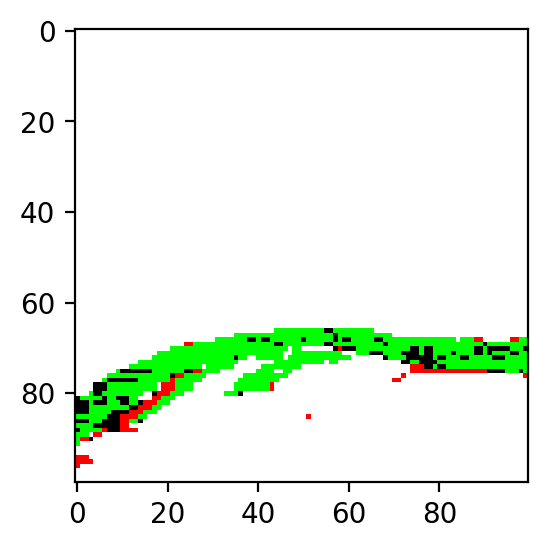

In [5]:
colors = ['#FF0000', '#000000', '#00FF00', '#FFFFFF']
scale = [0, 90, 110, 200, 256]

cha_map=matplotlib.colors.ListedColormap(colors)
cha_norm=matplotlib.colors.BoundaryNorm(scale, len(colors))

plt.imshow(cha, cmap=cha_map, norm=cha_norm, interpolation ='none')

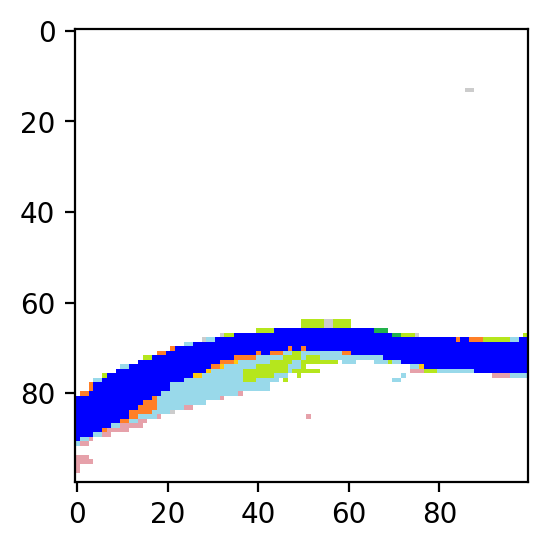

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors
colors = ['#FFFFFF', '#0000FF', '#22B14C', '#D1102D', '#99D9EA', '#B5E61D', 
          '#E6A1AA', '#FF7F27', '#FFC90E', '#7F7F7F', '#C3C3C3', '#CCCCCC']

scale = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255]

tra_map=matplotlib.colors.ListedColormap(colors)
tra_norm=matplotlib.colors.BoundaryNorm(scale, len(colors))

plt.imshow(tra, cmap=tra_map, norm=tra_norm, interpolation ='none')

In [7]:
per = np.zeros(tra.shape)
for i in range(tra.shape[0]):
    for j in range(tra.shape[1]):
        if tra[i, j] == 1 or tra[i, j] == 2 or tra[i, j] == 3 or tra[i, j] == 7 or tra[i, j] == 8 or tra[i, j] == 9:
            per[i, j] = cha[i, j]
        else:
            per[i, j] = 255

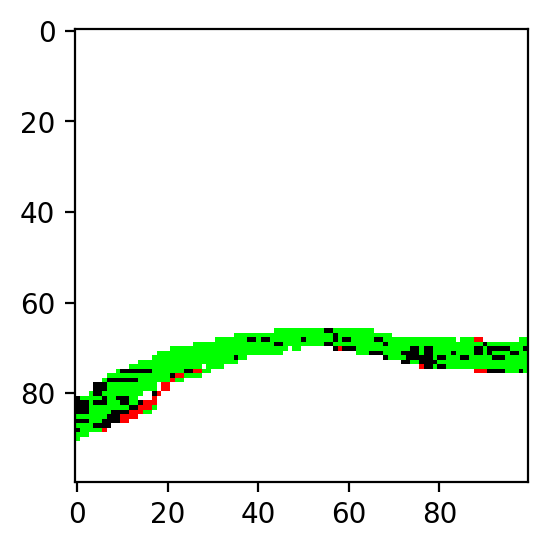

In [11]:
plt.imshow(per, cmap=cha_map, norm=cha_norm, interpolation ='none')
plt.show()

In [9]:
class Process:
    def __init__(self, arr):
        self.arr = self.convertToBinary(arr)

    def hor(self):
        return self.arr.sum(axis = 0)
    
    def ver(self):
        return self.arr.sum(axis = 1)
    
    def axis(self): 
        return np.linspace(0, self.arr.shape[0], self.arr.shape[0]) #assuming square
        
    def convertToBinary(self, arr):
        out = np.zeros(arr.shape)
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                if self.isWater(arr[i, j]):
                    out[i, j] = 1
        return out
    
    def isWater(self, val):
        if val == 255: #subject to change depending on incoming data
            return False
        return True

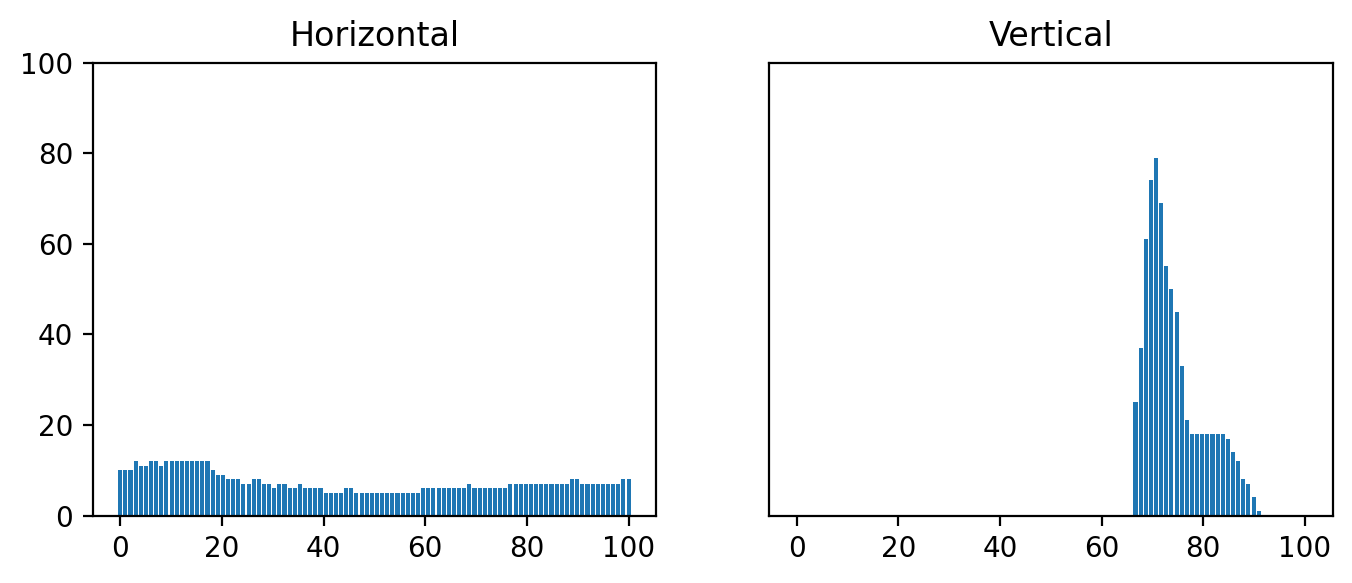

In [10]:
plt.rcParams['figure.figsize'] = (8, 3)
p = Process(per)
h = p.hor()
v = p.ver()
a = p.axis()
plt.subplot(1, 2, 1)
plt.bar(a, h)
plt.title('Horizontal')
plt.yticks(np.linspace(0, 100, 6))
plt.subplot(1, 2, 2)
plt.bar(a, v)
plt.title('Vertical')
plt.yticks([])
plt.ylim(0, 100)
plt.show()


In [126]:
n = 0
img3 = np.empty(img.shape)
for i in range(img.shape[0]):
    if n % 1000 == 0:
        print(n, '/', img.shape[0])
    n += 1
    for j in range(img.shape[1]):
        if img[i, j] > 200:
            img[i, j] = 255
        else:
            img[i, j] = 0


NameError: name 'img' is not defined

<class 'numpy.ndarray'>
(1000, 1000)


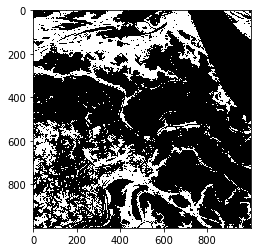

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(type(img3))
print(img3.shape)
plt.imshow(img[:,:], interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()
print(img3)

In [11]:
class Sobel:
    def __init__(self):
        self.a = np.array([1, 2, 1])
        self.b = np.array([-1, 0, 1])
        
    def convolve(self, arr):
        print('Calc Vert')
        gx = np.empty(shape = arr.shape)
        print(gx.shape)
        for i in range(1, len(gx) - 1):
            if i % 10000 == 0:
                print(i)
            gx[i] = np.convolve(arr[i], self.b, 'same')
        gx = gx.T
        for j in range(1, len(gx) - 1):
            if j % 10000 == 0:
                print(j)
            gx[i] = np.convolve(gx[j], self.a, 'same')
        gx = gx.T
        return gx
    

In [12]:
s = Sobel()
Gx = s.convolve(img)
Gy = s.convolve(img.T).T
G = Gx + Gy

Calc Vert
(1000, 1000)
Calc Vert
(1000, 1000)


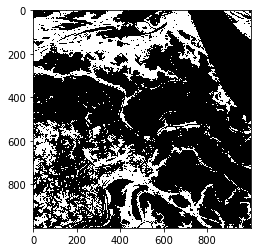

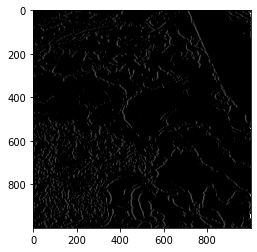

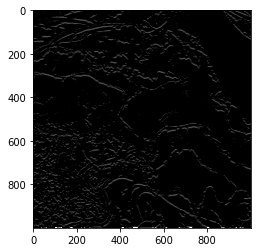

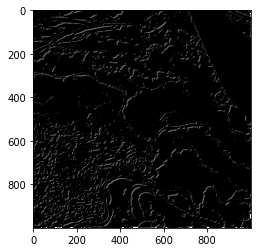

In [13]:
plt.imshow(img[:,:], interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(Gx, interpolation='quadric', cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(Gy, interpolation='quadric', cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(G, interpolation='quadric', cmap='gray', vmin=0, vmax=255)
plt.show()

In [14]:
n = 0
img = np.empty(Gx.shape)
for i in range(Gx.shape[0]):
    if n % 1000 == 0:
        print(n, '/', img.shape[0])
    n += 1
    for j in range(img.shape[1]):
        if Gx[i, j] != 0:
            Gx[i, j] = 0
            img[i, j] = 0
        else:
            Gx[i, j] = 255
            img[i, j] = 255
        if Gy[i, j] != 0:
            Gy[i, j] = 0
            img[i, j] = 0
        else:
            Gy[i, j] = 255
            img[i, j] = 255


0 / 1000


In [53]:
X = []
for i in range(len(G)):
    for j in range(len(G[0])):
        if img[i, j] == 0:
            X.append([i, j])

In [54]:
len(X)

90090

In [55]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=100, min_samples=6).fit(X)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
len(set(clustering.labels_))

2

In [57]:
Y = np.zeros(G.shape)
n = 0
c = 255 // len(set(clustering.labels_))
for i in range(len(X)):
    Y[X[i][0], X[i][1]] = c * (1 + clustering.labels_[i])

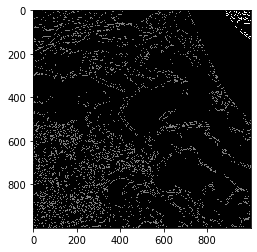

In [58]:
plt.imshow(Y, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()

In [59]:
X = []
for i in range(len(img)):
    for j in range(len(img[0])):
        if img[i, j] == 0:
            X.append([i, j])

In [70]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=100, min_samples=7).fit(X)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
len(set(clustering.labels_))

2

In [72]:
Y = np.zeros(img.shape)
n = 0
c = 255 // len(set(clustering.labels_))
for i in range(len(X)):
    Y[X[i][0], X[i][1]] = c * (2 + clustering.labels_[i])

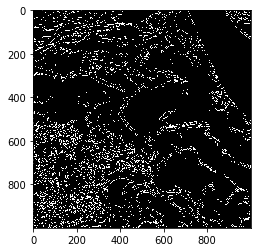

In [73]:
plt.imshow(Y, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()

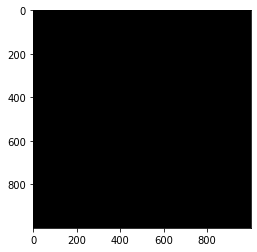

In [74]:
plt.imshow(img3, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
new_cmap = LinearSegmentedColormap.from_list('new_cmap', ['#ff0000', '#000000','#00ff00', '#CCCCCC'],N = 255)


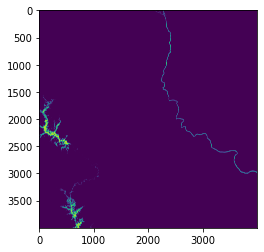

In [5]:
from matplotlib import pyplot as plt

plt.imshow(occ, cmap = 'viridis')
#plt.imshow(img, interpolation='quadric', cmap = new_cmap)
plt.show()